Chapter 04

# 3 x 3方阵行列式对应平行六面体体积
《线性代数》 | 鸢尾花书：数学不难

这段代码从数学的角度，旨在构造并可视化一个由三维空间中三个向量张成的**平行六面体（Parallelepiped）**。具体过程涉及线性代数中向量、矩阵、向量加法和几何可视化的核心概念。

---

### 一、向量空间与矩阵列向量

首先，定义了一个 $3 \times 3$ 的实矩阵：
$$
A = \begin{bmatrix}
2 & 0 & 2 \\
2 & 2 & 0 \\
0 & 2 & 2
\end{bmatrix}
$$

矩阵 $A$ 的每一列向量分别定义为：
- $ \mathbf{a}_1 = A[:, 0] = \begin{bmatrix} 2 \\ 2 \\ 0 \end{bmatrix} $
- $ \mathbf{a}_2 = A[:, 1] = \begin{bmatrix} 0 \\ 2 \\ 2 \end{bmatrix} $
- $ \mathbf{a}_3 = A[:, 2] = \begin{bmatrix} 2 \\ 0 \\ 2 \end{bmatrix} $

这三个向量 $\mathbf{a}_1, \mathbf{a}_2, \mathbf{a}_3$ 构成了三维欧几里得空间 $\mathbb{R}^3$ 中的一个向量组，它们线性无关，因此可以张成一个三维体积 —— 即平行六面体。

---

### 二、平行六面体的几何构造

平行六面体是由原点 $O = (0, 0, 0)$ 及上述三个向量经过向量加法构造出的八个顶点：

- $P_1 = \mathbf{a}_1$
- $P_2 = \mathbf{a}_2$
- $P_3 = \mathbf{a}_3$
- $P_4 = \mathbf{a}_1 + \mathbf{a}_2$
- $P_5 = \mathbf{a}_1 + \mathbf{a}_3$
- $P_6 = \mathbf{a}_2 + \mathbf{a}_3$
- $P_7 = \mathbf{a}_1 + \mathbf{a}_2 + \mathbf{a}_3$

这 8 个顶点构成了平行六面体的结构，其六个面由 4 个顶点构成的平行四边形组成，具体如下：

- 底面：$[O, P_1, P_4, P_2]$
- 前侧面：$[O, P_2, P_6, P_3]$
- 右侧面：$[O, P_1, P_5, P_3]$
- 顶面：$[P_7, P_4, P_1, P_5]$
- 左后侧面：$[P_7, P_4, P_2, P_6]$
- 背面：$[P_7, P_5, P_3, P_6]$

---

### 三、几何解释与体积

该平行六面体的体积等于这三个向量所张成的**混合积**（triple scalar product）的绝对值：
$$
V = |\mathbf{a}_1 \cdot (\mathbf{a}_2 \times \mathbf{a}_3)|
$$
这是一个标量，反映了这三个向量张成的有向体积。

---

### 四、图像可视化与三维渲染

代码最后使用 Matplotlib 的三维绘图工具 `mpl_toolkits.mplot3d` 来绘制：

- 以原点为起点画出三根向量 $\mathbf{a}_1$（红色）、$\mathbf{a}_2$（绿色）、$\mathbf{a}_3$（蓝色）
- 构建一个透明的黄色平行六面体，用于表示这三个向量张成的空间区域
- 设置三维坐标轴的范围与标签，使得图像清晰显示向量关系及几何体的构造
- 使用正投影（`ax.set_proj_type('ortho')`）以及调整视角增强空间感

---

总结而言，这段代码将一个 $3 \times 3$ 矩阵 $A$ 看作由三个列向量组成的向量组，并利用它们在三维空间中构造一个几何体（平行六面体），进而通过三维图形方式可视化它们的空间组合关系。这不仅展示了线性代数中“张成空间”的概念，也提供了几何直观认知。

## 初始化

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

## 定义一个 3×3 矩阵 A

In [ ]:
A = np.array([[2, 0, 2],
              [2, 2, 0],
              [0, 2, 2]])

## 提取列向量

In [ ]:
a1 = A[:, 0]
a2 = A[:, 1]
a3 = A[:, 2]

## 构造平行六面体的8个顶点

In [ ]:
O = np.array([0, 0, 0])
P1 = a1
P2 = a2
P3 = a3
P4 = a1 + a2
P5 = a1 + a3
P6 = a2 + a3
P7 = a1 + a2 + a3

vertices = [O, P1, P2, P4, P3, P5, P6, P7]

## 定义六个面

In [ ]:
# 每个面是4个点
faces = [
    [O, P1, P4, P2],  # 底面
    [O, P2, P6, P3],  # 侧面
    [O, P1, P5, P3],  # 侧面
    [P7, P4, P1, P5], # 上面
    [P7, P4, P2, P6], # 侧面
    [P7, P5, P3, P6]  # 背面
]

## 可视化

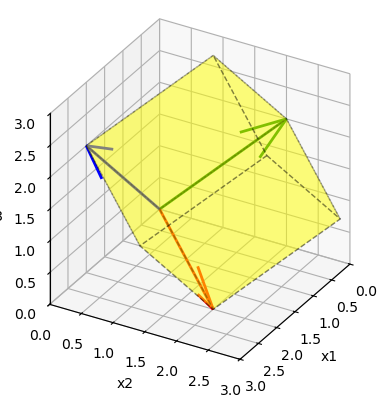

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制向量箭头
ax.quiver(0, 0, 0, *a1, color='red', linewidth=2)
ax.quiver(0, 0, 0, *a2, color='green', linewidth=2)
ax.quiver(0, 0, 0, *a3, color='blue', linewidth=2)

# 绘制平行六面体
face_collection = Poly3DCollection(faces, alpha=0.3, 
                                   facecolor='yellow', 
                                   edgecolor='black', ls = '--')
ax.add_collection3d(face_collection)

# 图像装饰
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
ax.view_init(elev=30, azim=30)  # 设置视角
ax.set_proj_type('ortho')
ax.set_box_aspect([1,1,1])

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  